
# Project: Investigate a Dataset (TMDB_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>### Overview
This data set contains information about 10,000 movies collected from The Movie Database (TMDB), including user ratings and revenue, etc.
>
>#### Questions to be analyzed:
>1. Movies with largest and smallest budgets
2. Movies with most and least earned Revenue
3. Movies with Highest and Lowest Profit
4. Movies with longest and shortest runtime
5. Average runtime of all movies
6. Which release year has more profitable movies
>
>#### Things to inspect:
>1. Successful Genres (with respect to profitable movies)
2. Frequent Cast (with respect to profitable movies)
3. Average budget (with respect to profitable movies)
4. Average Revenue (with respect to profitabe movies)
5. Average Duration of movie (with respect to profitable movies)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#importing section:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>After observing the dataset and proposed questions for analysis it is better to drop unused data to make analysis easier.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#load data:
df_tmdb = pd.read_csv('tmdb-movies.csv')

df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>### Observation from dataset:
> Since no currency unit was mentioned in the dataset. For the analysis I will assume it as USD
>

### Data Cleaning (Removing unused data from dataset)
>#### Important observation:
>1. We need to remove unused columns such as id, imdb_id, homepage, popularity, overview, etc
2. Remove duplicate row if found
3. If there is movies with zero budget or revenue it must be discarded
4. Convert Release date column into date format to use i if needed
5. Replace zero in Runtime with NaN
6. Change budget and revenue format from float to int


>#### Removing unused data:
__Columns to be removed:__ id, imdb_id, popularity, budget_adj, revenue_adj, homepage, overview, keywords and production_companies.

In [3]:
df_tmdb.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#creating a list of columns that will be removed
del_col = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'overview', 'keywords', 'production_companies']

#Removing Columns
df_tmdb.drop(del_col, axis=1, inplace=True)

In [5]:
#check dataset
df_tmdb.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


>#### 1.Removing Duplicate rows if found

In [6]:
df_tmdb.shape

(10866, 12)

In [7]:
#Remove Duplicates
df_tmdb.drop_duplicates(inplace=True)
df_tmdb.shape

(10865, 12)

>There was one duplicate row

>#### 2.Replacing zeros in budget and revenue columns to NAN then removing them

In [8]:
#Create a list of revenue and budget
temp_list = ['budget','revenue']

#Replace Zeros with NAN
df_tmdb[temp_list] = df_tmdb[temp_list].replace(0, np.NAN)

#Remove the rows with NAN value in budget and revenue columns
df_tmdb.dropna(subset=temp_list, inplace=True)

In [9]:
#Check dataset
df_tmdb.shape

(3854, 12)

>The number of rows is reduced from 10865 to 3854

>#### 3.Changing Release Date column to datetime format

In [10]:
df_tmdb.release_date = pd.to_datetime(df_tmdb['release_date'])

In [11]:
df_tmdb.head(3)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


>#### 4.Replacing zeros in runtime column with NAN

In [12]:
df_tmdb['runtime'] = df_tmdb['runtime'].replace(0,np.NAN)

In [13]:
#Check dataset runtime colummn for zeros
df_tmdb[df_tmdb['runtime'] == 0]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year


>#### 5.Changing revenue and budget format to int

In [14]:
#Checking current formats
df_tmdb.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [15]:
change_type = ['budget', 'revenue']

#Change data type
df_tmdb[change_type] = df_tmdb[change_type].astype(np.int64)

#check data type
df_tmdb.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [16]:
df_tmdb.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis
>#### 1. Calculating profit of each movie

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#Use insert function to add new column displayed in it the profit earned by each movie
df_tmdb.insert(2, 'profit_earned', df_tmdb['revenue'] - df_tmdb['budget'])

#check dataset
df_tmdb.head(4)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015


In [18]:
#define a function that displays the max and min ratings
def calculate(column):
    #For Max
    high = df_tmdb[column].idxmax()
    high_det = pd.DataFrame(df_tmdb.loc[high])
    
    #For Min
    low = df_tmdb[column].idxmin()
    low_det = pd.DataFrame(df_tmdb).loc[low]
    
    #Collection of obtained data
    #Use pd.concat method to get the collected info in one dataframe and set axis=1
    info = pd.concat([high_det, low_det], axis=1)
    
    return info

### Research Question 1 (Movies which had Largest and Smallest budget)

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Research Question 2  (Movies with Most and Least Earned Revenue)

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


### Research Question 3  (Movies with Higest and Lowest Earned Profit)

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Research Question 4  (Movies with Longest and Shortest Runtime)

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### Research Question 5 (Average Runtime of all movies)

In [23]:
#create a function that calculates the average of a column
def avg_fun(column):
    return df_tmdb[column].mean()

In [24]:
#Average of all movies runtime in minutes
avg_fun('runtime')

109.22029060716139

>So the average runtime of all movies is 109 min

### Research Question 6 (Years of release vs Profitability)

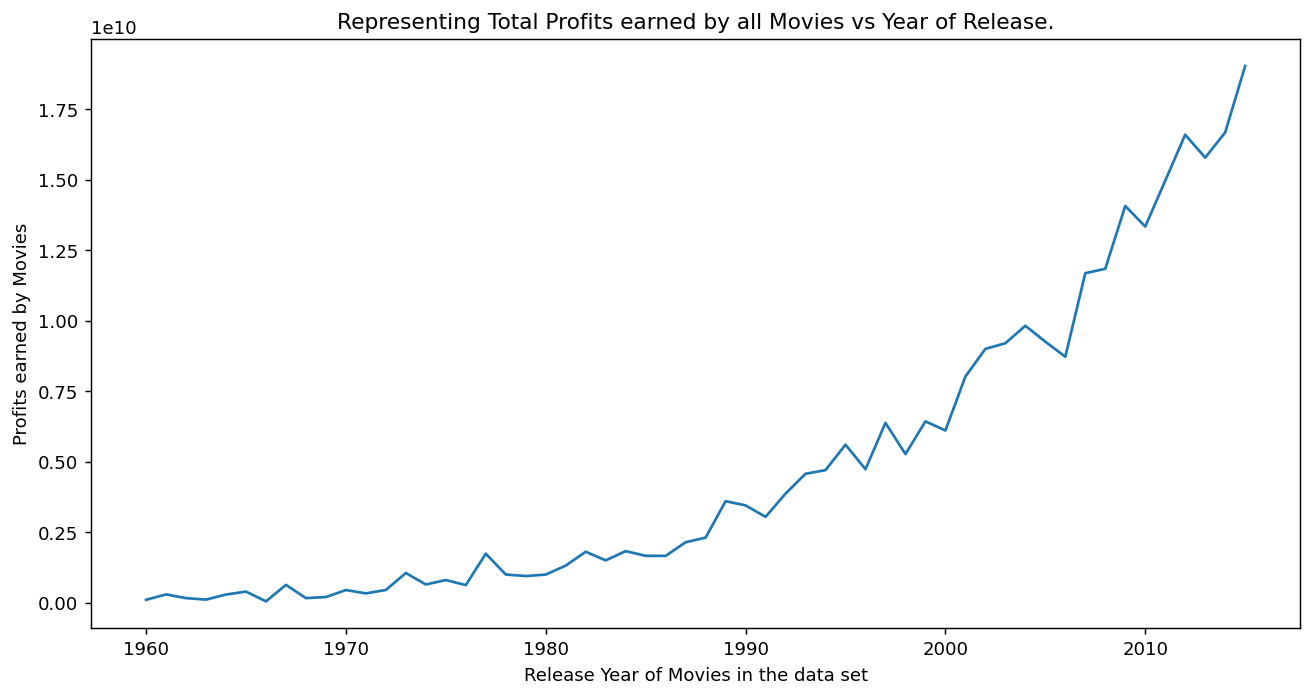

In [25]:
#We want to know the profits of movies for every year so we have to sum up all the moies of a particular year

profits_year = df_tmdb.groupby('release_year')['profit_earned'].sum()

#plot to display
plt.figure(figsize=(12,6), dpi=130)
# x-axis
plt.xlabel('Release Year of Movies in the data set')
# y-axis
plt.ylabel('Profits earned by Movies')
#title of plot
plt.title('Representing Total Profits earned by all Movies vs Year of Release.')

#plot the graph
plt.plot(profits_year)

#displaying the plot
plt.show();

In [26]:
#Which year made the highest profit?
profits_year.idxmax()

2015

>So we can conclude both graphically as well as by calculations that year 2015 was the year where movies made the highest profit.
>
>We are now done with analysing the given dataset.We will now find characteristics of profitable movies.

>### Things to inspect with respect to the profitable movies
>
>1. Successful Genres (with respect to profitable movies)
2. Frequent Cast (with respect to profitable movies)
3. Average budget (with respect to profitable movies)
4. Average Revenue (with respect to profitabe movies)
5. Average Duration of movie (with respect to profitable movies)
>
>Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.
>
>### So lets fix this amount to 50 million dollar.

In [27]:
#selecting the movies having profit of $50M or more
profit_data = df_tmdb.query('profit_earned >= 50000000')

#reindexing to start from 1 instead of 0
profit_data.index = range(len(profit_data))

#starting from 1
profit_data.index = profit_data.index + 1

#check the new data set
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


In [28]:
profit_data.shape

(1338, 13)

>Number of rows is reduced from 3854 to 1338

In [29]:
#Create a function that takes any column as argument and keeps track of it
#This function will be used to get profitable genres and frequent cast
def track(column):
    #take the column and seperate the string by '|'
    data = profit_data[column].str.cat(sep='|')
    
    #making pandas series and storing the values seperately
    data = pd.Series(data.split('|'))
    
    #arranging the data in descending order and counting it
    count = data.value_counts(ascending=False)
    
    return count

### Things to inspect 1 : Succesful Genres

>We can use the returned data to get graphical representation of successful genres

In [30]:
#variable to store the returned value
count = track('genres')

#check the function return value
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

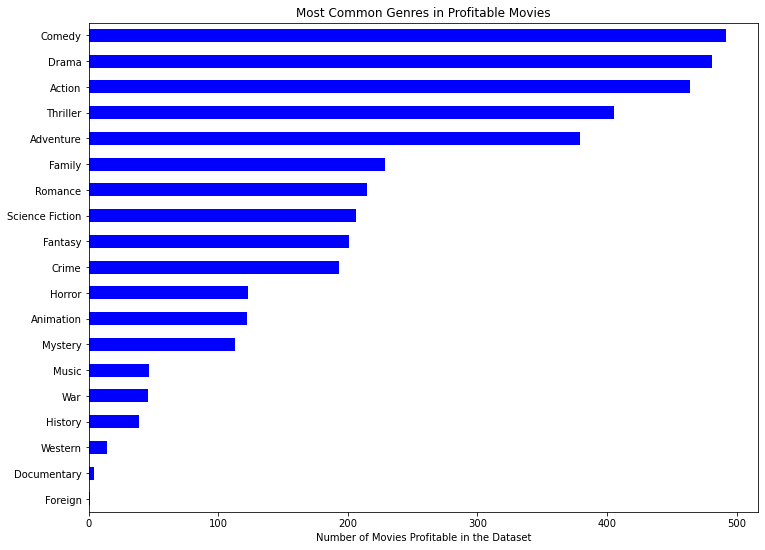

In [31]:
#Sort count values
count.sort_values(ascending=True, inplace=True)
#plotting data
genre_plt = count.plot.barh(color='blue')
genre_plt.set(title='Most Common Genres in Profitable Movies')
genre_plt.set_xlabel('Number of Movies Profitable in the Dataset')
genre_plt.figure.set_size_inches(12,9);

### Things to inspect 2 : Most Frequent Cast
>We will call the same function track(column) again for this analysis

In [32]:
#variable to store returned data
count = track('cast')

#show top cast
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

>This shows that Tom Cruise is on top of the list with 27 cast followed by Brad Pitt with 25 cast and Tom Hanks with 22 cast

### Things to inspect 3 : Average Budget of the profitable movies

In [33]:
#create another function to calculate the mean from the profit_data
#The function takes any column as argument
def profit_avg(column):
    return profit_data[column].mean()

In [34]:
#Getting the average budget of profitable movies
profit_avg('budget')

60444957.76083707

>So the movies having profit of 50 million dollar and more have an average budget of 60 million dollar.

### Things to inspect 4 : Average Revenue Earned by profitable movies

In [35]:
#calling profit_avg function again
profit_avg('revenue')

254957662.59491777

>So the movies having profit of 50 million dollar and more have an average revenue of 255 million dollar.

### Things to inspect 5 : Average Runtime of profitable movies

In [36]:
#Calling profit_avg again to get the average runtime of profitable movies
profit_avg('runtime')

113.66741405082212

>So the movies having profit of 50 million dollar and more have an average duration of 113 minutes

<a id='conclusions'></a>
## Conclusions

>### For a Movie to be successful
>1. Average Budget must be around 60 million USD
2. Average Duration of the movie must be 113 minutes
3. The Movie will be a great success if it has in its cast: Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone or Cameron Diaz
4. the Movie should be of Genre: Comedy, Drama, Action, Thriller or Adventure to be Success.
>
>### Limitations:
>This analysis was done considering the profitable movies of about 50 million USD profit. There might be some errors but by following the above suggestions the probabilty that the Movie might become a hit will increase. And something to take in consideration we are not sure if the data provided to us is completely correct and precise. As mentioned before the revenue and budget columns do not have currency unit, so if there was a movie with different currency rather than USD the whole analysis will be wrong. We also dropped the rows with missing values and this might have affected the analysis.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1